In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sodapy import Socrata

In [3]:
client = Socrata('data.nashville.gov', 'x0hFb5ic7wmJicIO3BxArvLB1' , username='xxxxxxxx@gmail.com', password='xxxxxxxx')
results = client.get("8kay-6qhc", limit=100000)

In [4]:
len(results)

34580

In [6]:
pd.set_option('display.max_columns', 1000)
df = pd.DataFrame.from_records(results)
df.head()

,accident_number,date_and_time,number_of_motor_vehicles,number_of_injuries,number_of_fatalities,hit_and_run,reporting_officer,collision_type,collision_type_description,weather,weather_description,illumination,illumination_description,harmful_codes,harmful_codes_description,street_address,city_name,state_name,zip_code,rpa,precinct,latitude,longitude,geocoded_column,:@computed_region_wvby_4s8j,:@computed_region_3aw5_2wv7,:@computed_region_p6sk_2acq,:@computed_region_gxvr_9jxz,property_damage
0,20180036801,2018-01-11T22:45:00.000,2,0,0,N,134892,4,ANGLE,2,RAIN,3,DARK - LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,CHARLOTTE AV & 14TH AVN,NASHVILLE,TN,37203,5425,NORTH,36.1605,-86.7942,"{'type': 'Point', 'coordinates': [-86.7942, 36...",1,1,20,40,NaN
1,20180045842,2018-01-15T06:08:00.000,2,0,0,N,191578,4,ANGLE,21,CLEAR,4,DAWN,12,MOTOR VEHICLE IN TRANSPORT,I40 E ENT RAMP & I 40,NASHVILLE,TN,37205,4903,WEST,36.1109,-86.922,"{'type': 'Point', 'coordinates': [-86.922, 36....",1,1,32,46,NaN
2,20180153800,2018-02-16T06:40:00.000,2,0,0,N,279230,5,SIDESWIPE - SAME DIRECTION,22,CLOUDY,1,DAYLIGHT,12,MOTOR VEHICLE IN TRANSPORT,SCOTT AV & DOUGLAS AV,NASHVILLE,TN,37206,1347,EAST,36.1913,-86.7333,"{'type': 'Point', 'coordinates': [-86.7333, 36...",1,1,14,4,NaN
3,20180166696,2018-02-20T15:25:00.000,2,1,0,N,256500,4,ANGLE,21,CLEAR,1,DAYLIGHT,12,MOTOR VEHICLE IN TRANSPORT,MM 211 6 I 40,NASHVILLE,TN,37210,82042,HERMIT,36.1508,-86.7502,"{'type': 'Point', 'coordinates': [-86.7502, 36...",1,1,20,11,NaN
4,20180217468,2018-03-08T11:10:00.000,2,0,0,N,279230,4,ANGLE,21,CLEAR,1,DAYLIGHT,14,PARKED MOTOR VEHICLE,ROCKLAND TRL & ROCK CREEK DR,ANTIOCH,TN,37013,8903,SOUTH,36.0337,-86.5886,"{'type': 'Point', 'coordinates': [-86.5886, 36...",1,1,33,15,NaN


In [7]:
pd.set_option('display.max_columns', 1000)
df.drop(['property_damage', 'accident_number', 'reporting_officer', 'collision_type', 'weather', 'illumination', 
         'harmful_codes', 'state_name', 'rpa', 'geocoded_column', ':@computed_region_wvby_4s8j', 
         ':@computed_region_3aw5_2wv7', ':@computed_region_p6sk_2acq', ':@computed_region_gxvr_9jxz',
         'property_damage'], axis=1, inplace=True)   # dropped many many columns
df.tail()

,date_and_time,number_of_motor_vehicles,number_of_injuries,number_of_fatalities,hit_and_run,collision_type_description,weather_description,illumination_description,harmful_codes_description,street_address,city_name,zip_code,precinct,latitude,longitude
34575,2018-08-20T06:54:00.000,1,0,0,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,RAIN,DAYLIGHT,CONCRETE TRAFFIC BARRIER,MM 91 3 I 65,MADISON,37115,MADISO,36.2514,-86.7406
34576,2018-10-25T15:30:00.000,2,0,0,N,ANGLE,CLOUDY,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,DONELSON PKE & I40 W ENT RAMP,NASHVILLE,37214,HERMIT,36.143,-86.6667
34577,2018-10-24T21:34:00.000,2,0,0,N,REAR-TO-REAR,CLEAR,DARK - LIGHTED,PARKED MOTOR VEHICLE,981 MURFREESBORO PKE,NASHVILLE,37217,SOUTH,36.1295,-86.7148
34578,2018-09-07T17:22:00.000,2,0,0,N,Front to Rear,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,MM 205 2 I 40,NASHVILLE,37209,WEST,36.154,-86.835
34579,2018-10-11T07:55:00.000,2,0,0,N,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,CHURCH ST & 14TH AVN,NASHVILLE,37203,MIDTOW,36.1579,-86.7916


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34580 entries, 0 to 34579
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date_and_time               34580 non-null  object
 1   number_of_motor_vehicles    34579 non-null  object
 2   number_of_injuries          34580 non-null  object
 3   number_of_fatalities        34576 non-null  object
 4   hit_and_run                 34580 non-null  object
 5   collision_type_description  34579 non-null  object
 6   weather_description         34508 non-null  object
 7   illumination_description    34549 non-null  object
 8   harmful_codes_description   34252 non-null  object
 9   street_address              34579 non-null  object
 10  city_name                   34580 non-null  object
 11  zip_code                    34525 non-null  object
 12  precinct                    34554 non-null  object
 13  latitude                    34548 non-null  ob

In [12]:
df['number_of_motor_vehicles'].value_counts()

2    26360
1     5235
3     2441
4      428
5       80
6       25
7        6
8        4
Name: number_of_motor_vehicles, dtype: int64

In [13]:
df['number_of_motor_vehicles'].isnull().value_counts()

False    34579
True         1
Name: number_of_motor_vehicles, dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,date_and_time,number_of_motor_vehicles,number_of_injuries,number_of_fatalities,hit_and_run,collision_type_description,weather_description,illumination_description,harmful_codes_description,street_address,city_name,zip_code,precinct,latitude,longitude
7,2018-04-13T14:45:00.000,2,0,0,N,Front to Rear,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,HILLSBORO PKE & STANFORD DR,NASHVILLE,NaN,WEST,NaN,NaN
8,2018-04-17T12:35:00.000,1,1,0,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,"OTHER POST, POLE, SUPP.",CHARLOTTE AV & SHORTVIEW AV,NASHVILLE,NaN,NORTH,NaN,NaN
15,2018-05-30T16:13:00.000,3,0,0,N,Front to Rear,NaN,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,MM 7 1 I 440,NASHVILLE,37210,SOUTH,36.1249,-86.7355
16,2018-06-06T14:58:00.000,2,0,0,N,ANGLE,NaN,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,MM 53 7 I 24,NASHVILLE,37211,SOUTH,36.1097,-86.7216
19,2018-06-18T09:30:00.000,3,0,0,N,Front to Rear,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,LOMBARDY AV & HILLSBORO PKE,NASHVILLE,NaN,WEST,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34089,2018-12-25T22:03:00.000,1,0,0,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DARK - LIGHTED,NaN,SOLON DR & ROSEBANK AV,NASHVILLE,37206,EAST,36.1891,-86.7095
34125,2018-09-27T09:40:00.000,2,0,0,N,ANGLE,NaN,NaN,MOTOR VEHICLE IN TRANSPORT,RIO VISTA DR & CHARTER VILLAGE APTS PVTD,MADISON,37115,MADISO,36.2685,-86.6826
34345,2018-09-08T14:19:00.000,1,1,0,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLOUDY,DAYLIGHT,NaN,WOODLAND ST & S 8TH ST,NASHVILLE,37206,EAST,36.1744,-86.7581
34401,2018-11-24T14:46:00.000,1,1,0,N,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,CLEAR,DAYLIGHT,NaN,RIVERSIDE DR & EASTLAND AV,NASHVILLE,37206,EAST,36.1818,-86.7256


In [15]:
df[df.isnull().any(axis=1)].shape

(479, 15)

In [17]:
df.iloc[18387]

date_and_time                                 2018-02-10T14:04:00.000
number_of_motor_vehicles                                            1
number_of_injuries                                                  6
number_of_fatalities                                                1
hit_and_run                                                         N
collision_type_description    NOT COLLISION W/MOTOR VEHICLE-TRANSPORT
weather_description                                              RAIN
illumination_description                                     DAYLIGHT
harmful_codes_description                                         NaN
street_address                                          MM 205 8 I 40
city_name                                                   NASHVILLE
zip_code                                                        37209
precinct                                                         WEST
latitude                                                      36.1565
longitude           

In [18]:
harm = {np.nan: 'MOTOR VEHICLE IN TRANSPORT'
            }            #except row 18387 since it has a fatality, column ['number_of_motor_vehicles'], filling in
                             #  with mode ('MOTOR VEHICLE IN TRANSPORT')
    
df['harmful_codes_description'] = df['harmful_codes_description'].replace(harm)

In [19]:
df = df.dropna()      #will drop remaing rows with Nans due to categorical nature of features and severe oversampling

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34429 entries, 0 to 34579
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date_and_time               34429 non-null  object
 1   number_of_motor_vehicles    34429 non-null  object
 2   number_of_injuries          34429 non-null  object
 3   number_of_fatalities        34429 non-null  object
 4   hit_and_run                 34429 non-null  object
 5   collision_type_description  34429 non-null  object
 6   weather_description         34429 non-null  object
 7   illumination_description    34429 non-null  object
 8   harmful_codes_description   34429 non-null  object
 9   street_address              34429 non-null  object
 10  city_name                   34429 non-null  object
 11  zip_code                    34429 non-null  object
 12  precinct                    34429 non-null  object
 13  latitude                    34429 non-null  ob

In [22]:
df['number_of_motor_vehicles'].value_counts()

2    26264
1     5202
3     2426
4      422
5       80
6       25
7        6
8        4
Name: number_of_motor_vehicles, dtype: int64

In [28]:
df['number_of_motor_vehicles'].unique()

array([2, 3, 8, 1, 4, 5, 7, 6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128db13a0>]],
      dtype=object)

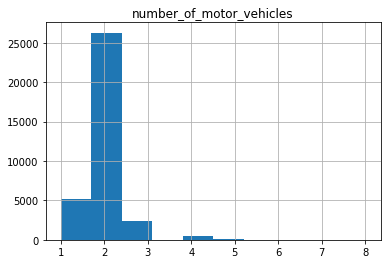

In [29]:
df['number_of_motor_vehicles'] = pd.to_numeric(df['number_of_motor_vehicles'])  
                                                                        
df.hist(['number_of_motor_vehicles'])

In [30]:
df['number_of_injuries'].value_counts()

0    25347
1     6672
2     1713
3      451
4      148
5       66
6       13
7       11
8        6
9        2
Name: number_of_injuries, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123671f10>]],
      dtype=object)

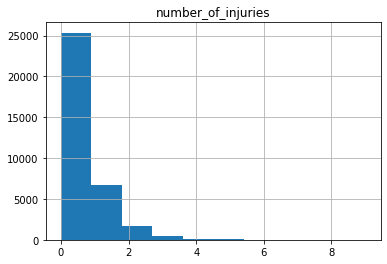

In [32]:
df['number_of_injuries'] = pd.to_numeric(df['number_of_injuries']) 
df.hist(['number_of_injuries'])

In [33]:
df['number_of_fatalities'].value_counts()

0    34334
1       89
2        5
3        1
Name: number_of_fatalities, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123b6d580>]],
      dtype=object)

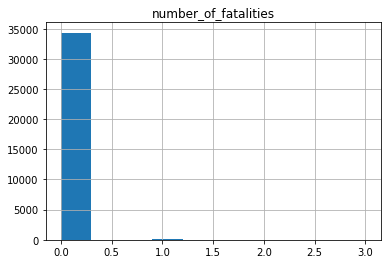

In [34]:
df['number_of_fatalities'] = pd.to_numeric(df['number_of_fatalities']) 
df.hist(['number_of_fatalities'])

In [43]:
hit = {'N': 0, 
        'Y': 1 }            #changing to int to produce graph
                            #26,396 NO, 8,033 yes
    
df['hit_and_run'] = df['hit_and_run'].replace(hit)

In [44]:
df['hit_and_run'].value_counts()

0    26396
1     8033
Name: hit_and_run, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1261280a0>]],
      dtype=object)

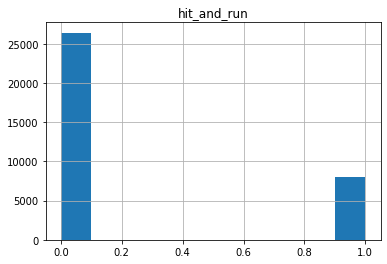

In [48]:
df.hist(['hit_and_run'])

In [50]:
df['collision_type_description'].value_counts()

Front to Rear                              12889
ANGLE                                       8222
NOT COLLISION W/MOTOR VEHICLE-TRANSPORT     5420
SIDESWIPE - SAME DIRECTION                  5148
HEAD-ON                                      736
SIDESWIPE - OPPOSITE DIRECTION               726
UNKNOWN                                      447
OTHER                                        443
Rear to Side                                 231
REAR-TO-REAR                                 167
Name: collision_type_description, dtype: int64

In [51]:
df['weather_description'].value_counts()

CLEAR                23633
RAIN                  5140
CLOUDY                4883
UNKNOWN                318
SNOW                   279
FOG                     70
SLEET, HAIL             64
OTHER (NARRATIVE)       22
BLOWING SNOW            13
SEVERE CROSSWIND         4
SMOG, SMOKE              3
Name: weather_description, dtype: int64

In [52]:
df['illumination_description'].value_counts()

DAYLIGHT                 23772
DARK - LIGHTED            7155
DARK - NOT LIGHTED        1891
DUSK                       690
DAWN                       326
UNKNOWN                    323
Dark-Unknown Lighting      217
OTHER                       55
Name: illumination_description, dtype: int64

In [77]:
df['harmful_codes_description'].value_counts()    #length 822

MOTOR VEHICLE IN TRANSPORT                                                                                                                                   26184
PARKED MOTOR VEHICLE                                                                                                                                          1246
MOTOR VEHICLE IN TRANSPORT;PARKED MOTOR VEHICLE                                                                                                                539
CONCRETE TRAFFIC BARRIER                                                                                                                                       403
PEDESTRIAN                                                                                                                                                     390
UTILITY POLE                                                                                                                                                   347
OTHER OBJECT (NOT FIXE

In [54]:
df['street_address'].value_counts()      #9,629

I40 E EXT RAMP & I 40      162
I24 W EXT RAMP & I 24      137
I40 W EXT RAMP & I 40      136
I24 E EXT RAMP & I 24      112
I40 E ENT RAMP & I 40      111
                          ... 
JOSEPHINE CT & OCALA DR      1
100 BROADWAY                 1
WHITNEY AV & VIVELLE AV      1
LONG BLVD & AVOCA ST         1
ESTES RD & CRESCENT RD       1
Name: street_address, Length: 9629, dtype: int64

In [55]:
df['city_name'].value_counts()

NASHVILLE         26423
ANTIOCH            3079
MADISON            2181
HERMITAGE          1243
WHITES CREEK        359
BRENTWOOD           344
OLD HICKORY         292
JOELTON             250
GOODLETTSVILLE      199
NOLENSVILLE          26
PEGRAM               25
MOUNT JULIET          5
ASHLAND CITY          3
Name: city_name, dtype: int64

In [56]:
df['zip_code'].value_counts()    #over 30 zipcodes

37211    3519
37013    3079
37203    2837
37210    2696
37207    2644
37115    2181
37217    1781
37209    1618
37214    1490
37076    1243
37204    1151
37208    1140
37206    1132
37221     836
37205     774
37212     762
37215     718
37220     635
37218     618
37213     585
37216     549
37201     522
37189     359
37027     344
37138     292
37080     250
37219     216
37072     199
37228     196
37135      26
37143      25
37122       5
37240       4
37015       3
Name: zip_code, dtype: int64

In [57]:
df['precinct'].value_counts() 

SOUTH     7415
MIDTOW    5709
HERMIT    5386
NORTH     3515
WEST      3394
CENTRA    3183
MADISO    2924
EAST      2903
Name: precinct, dtype: int64

In [58]:
df['latitude'].value_counts()  #length 2,741

36.155     189
36.1574    186
36.1109    184
36.1092    156
36.1074    141
          ... 
36.2004      1
36.3261      1
36.2429      1
36.3572      1
36.0306      1
Name: latitude, Length: 2741, dtype: int64

In [59]:
df['longitude'].value_counts()   #length 3,104

-86.7267    204
-86.7197    173
-86.7659    172
-86.79      167
-86.6271    165
           ... 
-86.6886      1
-86.8241      1
-86.8802      1
-86.6252      1
-86.6758      1
Name: longitude, Length: 3104, dtype: int64

In [60]:
df.head()

,date_and_time,number_of_motor_vehicles,number_of_injuries,number_of_fatalities,hit_and_run,collision_type_description,weather_description,illumination_description,harmful_codes_description,street_address,city_name,zip_code,precinct,latitude,longitude
0,2018-01-11T22:45:00.000,2,0,0,0,ANGLE,RAIN,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,CHARLOTTE AV & 14TH AVN,NASHVILLE,37203,NORTH,36.1605,-86.7942
1,2018-01-15T06:08:00.000,2,0,0,0,ANGLE,CLEAR,DAWN,MOTOR VEHICLE IN TRANSPORT,I40 E ENT RAMP & I 40,NASHVILLE,37205,WEST,36.1109,-86.922
2,2018-02-16T06:40:00.000,2,0,0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,SCOTT AV & DOUGLAS AV,NASHVILLE,37206,EAST,36.1913,-86.7333
3,2018-02-20T15:25:00.000,2,1,0,0,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,MM 211 6 I 40,NASHVILLE,37210,HERMIT,36.1508,-86.7502
4,2018-03-08T11:10:00.000,2,0,0,0,ANGLE,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ROCKLAND TRL & ROCK CREEK DR,ANTIOCH,37013,SOUTH,36.0337,-86.5886


In [134]:
#plt.figure(1, figsize=(14,10))
sns.heatmap(df, cmap="YlGnBu", mask=df.isnull())

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [62]:
df.shape

(34429, 15)

In [71]:
df.to_csv('Nashville Accidents(dropped columns and Nans.csv')

In [ ]:
#Matt advised to take out address, zip, precinct and probably harmful_codes_description

In [80]:
df.drop(['street_address', 'city_name', 'zip_code', 'precinct'], axis=1, inplace=True)

In [81]:
df.to_csv('Nashville Accidents2(columns Matt said to drop).csv')

In [191]:
df2 = pd.read_csv('Nashville Accidents2(columns Matt said to drop).csv', index_col=0)

In [192]:
import datetime
df2['date_and_time'] = pd.to_datetime(df2['date_and_time'])    #convert 'date_and_time' to dtype(datetime)
df2['date'] = df2['date_and_time'].dt.date                     #parse 'date' out of date_and_time'
df2['date'] = pd.to_datetime(df2['date'])                      #convert 'date' back to dtype(datetime)
df2['month'] = df2['date'].dt.month                            #parse 'month' out of 'date' and leave as dtype(int)

df2['time'] = df2['date_and_time'].dt.time               #parse 'time' out of 'date_and_time'
df2['hour'] = df2['date_and_time'].dt.hour               #parse 'hour' out of 'date_and_time and leave as dtype(int)

In [196]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34429 entries, 0 to 34579
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_motor_vehicles    34429 non-null  int64  
 1   number_of_injuries          34429 non-null  int64  
 2   number_of_fatalities        34429 non-null  int64  
 3   hit_and_run                 34429 non-null  int64  
 4   collision_type_description  34429 non-null  object 
 5   weather_description         34429 non-null  object 
 6   illumination_description    34429 non-null  object 
 7   harmful_codes_description   34429 non-null  object 
 8   latitude                    34429 non-null  float64
 9   longitude                   34429 non-null  float64
 10  month                       34429 non-null  int64  
 11  hour                        34429 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.4+ MB


In [197]:
df2.head()

,number_of_motor_vehicles,number_of_injuries,number_of_fatalities,hit_and_run,collision_type_description,weather_description,illumination_description,harmful_codes_description,latitude,longitude,month,hour
0,2,0,0,0,ANGLE,RAIN,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1605,-86.7942,1,22
1,2,0,0,0,ANGLE,CLEAR,DAWN,MOTOR VEHICLE IN TRANSPORT,36.1109,-86.9220,1,6
2,2,0,0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1913,-86.7333,2,6
3,2,1,0,0,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1508,-86.7502,2,15
4,2,0,0,0,ANGLE,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,36.0337,-86.5886,3,11


In [195]:
df2.drop(['date_and_time', 'date', 'time'], axis=1, inplace=True)     # dropped old datetime columns after parsing

In [198]:
df2.to_csv('Nashville Accidents3(datetime updated).csv')

In [199]:
df3 = pd.read_csv('Nashville Accidents3(datetime updated).csv', index_col=0)
df3.head()

,number_of_motor_vehicles,number_of_injuries,number_of_fatalities,hit_and_run,collision_type_description,weather_description,illumination_description,harmful_codes_description,latitude,longitude,month,hour
0,2,0,0,0,ANGLE,RAIN,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1605,-86.7942,1,22
1,2,0,0,0,ANGLE,CLEAR,DAWN,MOTOR VEHICLE IN TRANSPORT,36.1109,-86.9220,1,6
2,2,0,0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1913,-86.7333,2,6
3,2,1,0,0,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1508,-86.7502,2,15
4,2,0,0,0,ANGLE,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,36.0337,-86.5886,3,11


In [200]:
df3['injury or fatality'] = df3['number_of_injuries'] + df3['number_of_fatalities']  #combining injury + fatality
df3.head()

,number_of_motor_vehicles,number_of_injuries,number_of_fatalities,hit_and_run,collision_type_description,weather_description,illumination_description,harmful_codes_description,latitude,longitude,month,hour,injury or fatality
0,2,0,0,0,ANGLE,RAIN,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1605,-86.7942,1,22,0
1,2,0,0,0,ANGLE,CLEAR,DAWN,MOTOR VEHICLE IN TRANSPORT,36.1109,-86.9220,1,6,0
2,2,0,0,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1913,-86.7333,2,6,0
3,2,1,0,0,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1508,-86.7502,2,15,1
4,2,0,0,0,ANGLE,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,36.0337,-86.5886,3,11,0


In [203]:
df3['number_of_injuries'].sum()

12594

In [204]:
df3['injury or fatality'].sum()

12696

In [205]:
df3.drop(['number_of_injuries', 'number_of_fatalities'], axis=1, inplace=True)

In [206]:
df3.head()

,number_of_motor_vehicles,hit_and_run,collision_type_description,weather_description,illumination_description,harmful_codes_description,latitude,longitude,month,hour,injury or fatality
0,2,0,ANGLE,RAIN,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1605,-86.7942,1,22,0
1,2,0,ANGLE,CLEAR,DAWN,MOTOR VEHICLE IN TRANSPORT,36.1109,-86.9220,1,6,0
2,2,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1913,-86.7333,2,6,0
3,2,0,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1508,-86.7502,2,15,1
4,2,0,ANGLE,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,36.0337,-86.5886,3,11,0


In [209]:
df3['injury or fatality'] = np.where(df3['injury or fatality'] > 0,1,0)   #convert from cotinuous to binary
df3.head()

,number_of_motor_vehicles,hit_and_run,collision_type_description,weather_description,illumination_description,harmful_codes_description,latitude,longitude,month,hour,injury or fatality
0,2,0,ANGLE,RAIN,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1605,-86.7942,1,22,0
1,2,0,ANGLE,CLEAR,DAWN,MOTOR VEHICLE IN TRANSPORT,36.1109,-86.9220,1,6,0
2,2,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1913,-86.7333,2,6,0
3,2,0,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1508,-86.7502,2,15,1
4,2,0,ANGLE,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,36.0337,-86.5886,3,11,0


In [210]:
df3['injury or fatality'].sum()

9082

In [211]:
df3.to_csv('Nashville Accidents4(consolidate target + convert binary).csv')

In [278]:
df4 = pd.read_csv('Nashville Accidents4(consolidate target + convert binary).csv', index_col=0)

In [279]:
df4.head()

,number_of_motor_vehicles,hit_and_run,collision_type_description,weather_description,illumination_description,harmful_codes_description,latitude,longitude,month,hour,injury or fatality
0,2,0,ANGLE,RAIN,DARK - LIGHTED,MOTOR VEHICLE IN TRANSPORT,36.1605,-86.7942,1,22,0
1,2,0,ANGLE,CLEAR,DAWN,MOTOR VEHICLE IN TRANSPORT,36.1109,-86.9220,1,6,0
2,2,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1913,-86.7333,2,6,0
3,2,0,ANGLE,CLEAR,DAYLIGHT,MOTOR VEHICLE IN TRANSPORT,36.1508,-86.7502,2,15,1
4,2,0,ANGLE,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,36.0337,-86.5886,3,11,0


In [214]:
#def reduce_harm():

#df4['harmful_codes_description'] = df4['harmful_codes_description'].map(lambda x: x.rstrip(to_strip=';'))



TypeError: rstrip() takes no keyword arguments

In [215]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df4['harmful_codes_description'].value_counts()     #822 length

MOTOR VEHICLE IN TRANSPORT                                                                                                                                   26184
PARKED MOTOR VEHICLE                                                                                                                                          1246
MOTOR VEHICLE IN TRANSPORT;PARKED MOTOR VEHICLE                                                                                                                539
CONCRETE TRAFFIC BARRIER                                                                                                                                       403
PEDESTRIAN                                                                                                                                                     390
UTILITY POLE                                                                                                                                                   347
OTHER OBJECT (NOT FIXE

In [216]:
# harmful = {'MOTOR VEHICLE IN TRANSPORT;PARKED MOTOR VEHICLE': 'MOTOR VEHICLE IN TRANSPORT',
#     'MOTOR VEHICLE IN TRANSPORT;CONCRETE TRAFFIC BARRIER': 'MOTOR VEHICLE IN TRANSPORT', 
#         'PARKED MOTOR VEHICLE;Motor Vehicle-In-Motion Outside Trafficw': 'PARKED MOTOR VEHICLE',
#         'MOTOR VEHICLE IN TRANSPORT;UNKNOWN MOST HARMFUL EVENT': 'MOTOR VEHICLE IN TRANSPORT',
#           'MOTOR VEHICLE IN TRANSPORT;MOTOR VEHICLE IN TRANSPORT-OTHER ROADWAY':'MOTOR VEHICLE IN TRANSPORT',
#           'MOTOR VEHICLE IN TRANSPORT;GUARDRAIL FACE': 'MOTOR VEHICLE IN TRANSPORT',
#           'MOTOR VEHICLE IN TRANSPORT;UTILITY POLE':'MOTOR VEHICLE IN TRANSPORT',
#           'DITCH;Ran Off Road-Right': 'DITCH',
#            'UTILITY POLE;Ran Off Road-Right': 'UTILITY POLE',
#            'PARKED MOTOR VEHICLE;UNKNOWN MOST HARMFUL EVENT':'PARKED MOTOR VEHICLE',
#            'TREE;Ran Off Road-Right': 'TREE',
#            'MOTOR VEHICLE IN TRANSPORT;CURB':  'MOTOR VEHICLE IN TRANSPORT',            
#             'MOTOR VEHICLE IN TRANSPORT;OTHER OBJECT (NOT FIXED)': 'MOTOR VEHICLE IN TRANSPORT',                               
#             'MOTOR VEHICLE IN TRANSPORT;DITCH': 'MOTOR VEHICLE IN TRANSPORT',                                       
#             'CONCRETE TRAFFIC BARRIER;Ran Off Road-Left':  'CONCRETE TRAFFIC BARRIER',
#              'MAIL BOX;Ran Off Road-Right': 'MAIL BOX',
#         'MOTOR VEHICLE IN TRANSPORT;Motor Vehicle-In-Motion Outside Trafficw': 'MOTOR VEHICLE IN TRANSPORT',
#          'GUARDRAIL FACE;Ran Off Road-Right': 'GUARDRAIL FACE',
#           'GUARDRAIL FACE;CONCRETE TRAFFIC BARRIER':  'GUARDRAIL FACE',
           
           
#              }            

    
# df['harmful_codes_description'] = df['harmful_codes_description'].replace(harmful)

In [280]:
df4.drop(['harmful_codes_description'], axis=1, inplace=True)  #Matt recommended that I drop this, too hard to clean

In [281]:
df4.head()

,number_of_motor_vehicles,hit_and_run,collision_type_description,weather_description,illumination_description,latitude,longitude,month,hour,injury or fatality
0,2,0,ANGLE,RAIN,DARK - LIGHTED,36.1605,-86.7942,1,22,0
1,2,0,ANGLE,CLEAR,DAWN,36.1109,-86.9220,1,6,0
2,2,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,36.1913,-86.7333,2,6,0
3,2,0,ANGLE,CLEAR,DAYLIGHT,36.1508,-86.7502,2,15,1
4,2,0,ANGLE,CLEAR,DAYLIGHT,36.0337,-86.5886,3,11,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1308085e0>]],
      dtype=object)

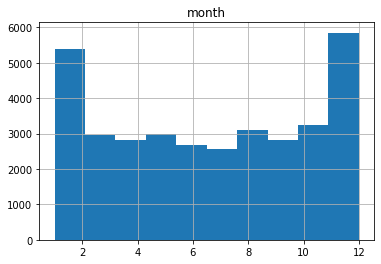

In [282]:
df4.hist(['month'])         #accidents/month (regardless of injury/fatality)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130805af0>]],
      dtype=object)

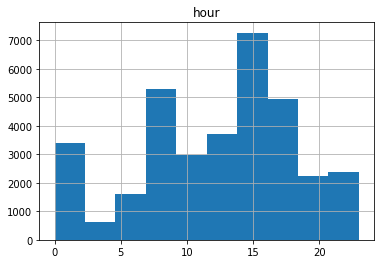

In [283]:
df4.hist(['hour']) 

In [284]:
df4 = pd.concat([df['date_and_time'], df4], axis=1)

In [285]:
df4['date_and_time'] = pd.to_datetime(df4['date_and_time'])

In [286]:
df4.head()

,date_and_time,number_of_motor_vehicles,hit_and_run,collision_type_description,weather_description,illumination_description,latitude,longitude,month,hour,injury or fatality
0,2018-01-11 22:45:00,2,0,ANGLE,RAIN,DARK - LIGHTED,36.1605,-86.7942,1,22,0
1,2018-01-15 06:08:00,2,0,ANGLE,CLEAR,DAWN,36.1109,-86.9220,1,6,0
2,2018-02-16 06:40:00,2,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,36.1913,-86.7333,2,6,0
3,2018-02-20 15:25:00,2,0,ANGLE,CLEAR,DAYLIGHT,36.1508,-86.7502,2,15,1
4,2018-03-08 11:10:00,2,0,ANGLE,CLEAR,DAYLIGHT,36.0337,-86.5886,3,11,0


In [287]:
df4['day of week'] = df4['date_and_time'].dt.dayofweek

In [288]:
df4.head()

,date_and_time,number_of_motor_vehicles,hit_and_run,collision_type_description,weather_description,illumination_description,latitude,longitude,month,hour,injury or fatality,day of week
0,2018-01-11 22:45:00,2,0,ANGLE,RAIN,DARK - LIGHTED,36.1605,-86.7942,1,22,0,3
1,2018-01-15 06:08:00,2,0,ANGLE,CLEAR,DAWN,36.1109,-86.9220,1,6,0,0
2,2018-02-16 06:40:00,2,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,36.1913,-86.7333,2,6,0,4
3,2018-02-20 15:25:00,2,0,ANGLE,CLEAR,DAYLIGHT,36.1508,-86.7502,2,15,1,1
4,2018-03-08 11:10:00,2,0,ANGLE,CLEAR,DAYLIGHT,36.0337,-86.5886,3,11,0,3


In [289]:
df4['day of week'].value_counts()

4    6012
3    5510
1    5286
2    5135
0    4964
5    4200
6    3322
Name: day of week, dtype: int64

In [290]:
df4.drop(['date_and_time'], axis=1, inplace=True)

In [291]:
df4.to_csv('Nashville Accidents5(added day of week).csv')

In [292]:
df5 = pd.read_csv('Nashville Accidents5(added day of week).csv', index_col=0)

In [293]:
df5.head()

,number_of_motor_vehicles,hit_and_run,collision_type_description,weather_description,illumination_description,latitude,longitude,month,hour,injury or fatality,day of week
0,2,0,ANGLE,RAIN,DARK - LIGHTED,36.1605,-86.7942,1,22,0,3
1,2,0,ANGLE,CLEAR,DAWN,36.1109,-86.9220,1,6,0,0
2,2,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,36.1913,-86.7333,2,6,0,4
3,2,0,ANGLE,CLEAR,DAYLIGHT,36.1508,-86.7502,2,15,1,1
4,2,0,ANGLE,CLEAR,DAYLIGHT,36.0337,-86.5886,3,11,0,3


In [297]:
df5.groupby('injury or fatality')['number_of_motor_vehicles'].mean()

injury or fatality
0    1.940427
1    1.996917
Name: number_of_motor_vehicles, dtype: float64

In [298]:
df5.groupby('hit_and_run')['injury or fatality'].mean()

hit_and_run
0    0.296560
1    0.156106
Name: injury or fatality, dtype: float64

In [300]:
col_dict = {
    'injury or fatality': 'injury_or_fatality',
    'day of week': 'day_of_week'
     }

df5.rename(columns = col_dict, inplace = True)

In [302]:
#default_by_age = df[df['default payment next month'] == 1]['AGE']
#no_default_by_age = df[df['default payment next month'] == 0]['AGE']
#stats.ttest_ind(default_by_age, no_default_by_age) #at 95% confidence interval, they are statistically different

In [304]:
df5 = pd.concat([df['date_and_time'], df5], axis=1) #temporarly adding date back for holiday
df5['date_and_time'] = pd.to_datetime(df5['date_and_time'])
df5['date'] = df5['date_and_time'].dt.date 
df5['date'] = pd.to_datetime(df5['date'])

In [325]:
import holidays         #adding holiday feature
US_holidays = holidays.CountryHoliday('US', prov=None, state='TN')
df5['holiday'] = df5['date'].map(lambda x: x in US_holidays).astype(int)

In [340]:
df5.drop(['date_and_time', 'date'], axis=1, inplace=True)

In [342]:
df5.to_csv('Nashville Accidents6(added holiday).csv')

In [343]:
df6 = pd.read_csv('Nashville Accidents6(added holiday).csv', index_col=0)

In [344]:
df6.head()

,number_of_motor_vehicles,hit_and_run,collision_type_description,weather_description,illumination_description,latitude,longitude,month,hour,injury_or_fatality,day_of_week,holiday
0,2,0,ANGLE,RAIN,DARK - LIGHTED,36.1605,-86.7942,1,22,0,3,0
1,2,0,ANGLE,CLEAR,DAWN,36.1109,-86.9220,1,6,0,0,1
2,2,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,36.1913,-86.7333,2,6,0,4,0
3,2,0,ANGLE,CLEAR,DAYLIGHT,36.1508,-86.7502,2,15,1,1,0
4,2,0,ANGLE,CLEAR,DAYLIGHT,36.0337,-86.5886,3,11,0,3,0


In [345]:
#dataset cleaned and features engineered